# **Playing around with stocks and their returns**

In [1]:
#Import libaries
import os
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import pandas.io.data as web
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\JM\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# Set workingdirectory
os.chdir('D:\\Uni\\VWL\\6. Semester\\Finanzmarktoekonometrie\\Hausaufgaben\\HA_1')

In [3]:
# Load data
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2016, 4, 9)
bmw_df = web.DataReader("BMW.DE", "yahoo", start, end)


In [4]:
bmw_df.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,31.00,32.0,28.66,29.49,1335300,15.489
2000-01-04,29.50,29.6,27.73,28.30,1564000,14.864
2000-01-05,27.50,28.1,27.00,27.74,1359500,14.570
2000-01-06,27.27,28.4,27.00,27.65,1064700,14.523
2000-01-07,27.76,28.3,27.27,27.60,1575700,14.496


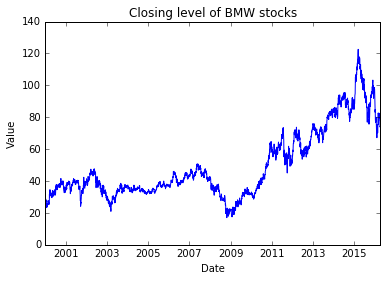

In [5]:
plt.plot(bmw_df.index, bmw_df['Close'])
plt.title('Closing level of BMW stocks')
plt.xlabel('Date')
plt.ylabel('Value')

In [6]:
#discrete returns function
def dis_return(ts):
    return (ts / ts.shift()) -1

In [7]:
bmw_df['Discrete Returns'] = dis_return(bmw_df['Adj Close'])

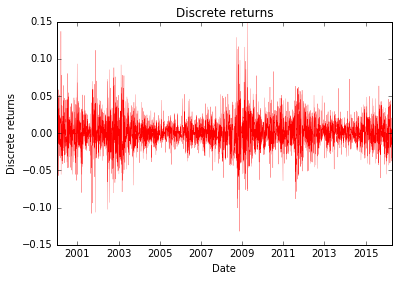

In [8]:
plt.plot(bmw_df.index, bmw_df['Discrete Returns'],
    color = 'red', linewidth = .2)
plt.title('Discrete returns')
plt.xlabel('Date')
plt.ylabel('Discrete returns')


In [9]:
# continuous returns
def con_returns(ts):
    return np.log(ts) - np.log(ts.shift())

In [10]:
bmw_df['Continuous Returns'] = con_returns(bmw_df['Adj Close'])

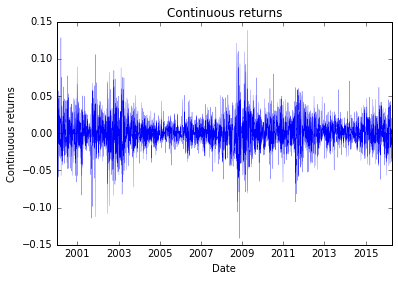

In [11]:
plt.plot(bmw_df.index, bmw_df['Continuous Returns'],
    color = 'blue', linewidth = .2)
plt.title('Continuous returns')
plt.xlabel('Date')
plt.ylabel('Continuous returns')

In [12]:
# Drop missing from lag
bmw_df = bmw_df.dropna()

In [13]:
# Descriptiv facts discrete returns
bmw_df['Discrete Returns'].describe()

count    4213.000000
mean        0.000596
std         0.021629
min        -0.131866
25%        -0.010397
50%         0.000000
75%         0.010939
max         0.148385
Name: Discrete Returns, dtype: float64

In [14]:
# Descriptiv facts continuous returns
bmw_df['Continuous Returns'].describe()

count    4213.000000
mean        0.000363
std         0.021589
min        -0.141409
25%        -0.010451
50%         0.000000
75%         0.010880
max         0.138356
Name: Continuous Returns, dtype: float64

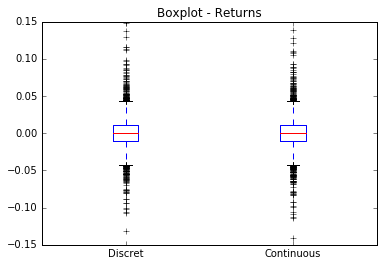

In [15]:
plt.boxplot([bmw_df['Discrete Returns'], bmw_df['Continuous Returns']], labels= ['Discret', 'Continuous'] )
plt.title('Boxplot - Returns')

In [16]:
## Loading Statoil Data
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2016, 1, 1)
shell_df = web.DataReader("GOOG", "yahoo", start, end)
shell_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,100.000168,104.060182,95.960165,100.340176,44871300,50.119968
2004-08-20,101.010175,109.080187,100.500174,108.310183,22942800,54.100990
2004-08-23,110.750191,113.480193,109.050183,109.400185,18342800,54.645447
2004-08-24,111.240189,111.600192,103.570177,104.870176,15319700,52.382705
2004-08-25,104.960181,108.000187,103.880180,106.000184,9232100,52.947145


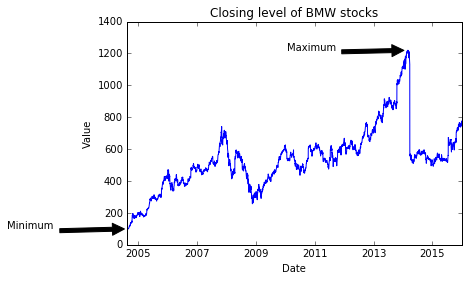

In [17]:
plt.plot(shell_df.index, shell_df['Close'])
plt.title('Closing level of BMW stocks')
plt.xlabel('Date')
plt.ylabel('Value')
plt.annotate('Maximum', xy= (shell_df[shell_df['Close'] == max(shell_df['Close'])].index[0], max(shell_df['Close'])),
             xytext = (shell_df[shell_df['Close'] == max(shell_df['Close'])].index[0] - datetime.timedelta(days = +1500), 
                       max(shell_df['Close']) + 2),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Minimum', xy= (shell_df[shell_df['Close'] == min(shell_df['Close'])].index[0], min(shell_df['Close'])),
             xytext = (shell_df[shell_df['Close'] ==  min(shell_df['Close'])].index[0] - datetime.timedelta(days = +1500), 
                      min(shell_df['Close']) ),
            arrowprops=dict(facecolor='black', shrink=0.05))